In [102]:
# Scientific libraries
import scipy
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Graphic libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
# import japanize_matplotlib
import seaborn as sns
# import holoviews as hv
# from bokeh.io import output_notebook
# output_notebook()
# from bokeh.io import show
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
# from ipywidgets import interact # Interactive graph

# Statistical libraries
# import statsmodels.stats as stats
# import statsmodels.stats.multicomp as multi
# import statsmodels.formula.api as smf
import scikit_posthocs as sp

# Other libraries
# import re
# from datetime import datetime
# import collections

# Creating alias for magic commands
%alias_magic t time

from icecream import ic

import requests
import zipfile
import math
from scipy.stats import binom
import os.path

Created `%t` as an alias for `%time`.
Created `%%t` as an alias for `%%time`.


In [103]:
def save_fig(name,
             exts=('pdf', 'png', 'svg', 'jpg'),
             bbox_inches='tight'):
    for ext in exts:
        plt.savefig('{}.{}'.format(name, ext),
                    format=ext,
                    bbox_inches=bbox_inches)

In [104]:
# 著者サイトからdata4*.csvをダウンロード
file_names = ["data4a.csv", "data4b.csv"]
data = []
for file_name in file_names:
    response = requests.get('https://kuboweb.github.io/-kubo/stat/iwanamibook/fig/binomial/{}'.format(file_name))

    if not os.path.exists(file_name):
        with open (file_name, 'wb') as f:
            f.write(response.content)
            f.close()
    data.append(pd.read_csv(file_name))

data[0]["d"] = (data[0]["f"] == "T")*1
display(data[0])
display(data[1])

,N,y,x,f,d
0,8,1,9.76,C,0
1,8,6,10.48,C,0
2,8,5,10.83,C,0
3,8,6,10.94,C,0
4,8,1,9.37,C,0
...,...,...,...,...,...
95,8,7,10.45,T,1
96,8,0,8.94,T,1
97,8,5,8.94,T,1
98,8,8,10.14,T,1


,y,x,A
0,57,0.68,10.3
1,64,0.27,15.6
2,49,0.46,10.0
3,64,0.45,14.9
4,82,0.74,14.0
...,...,...,...
95,57,0.76,9.8
96,49,0.17,12.5
97,95,0.98,11.4
98,27,0.54,5.4


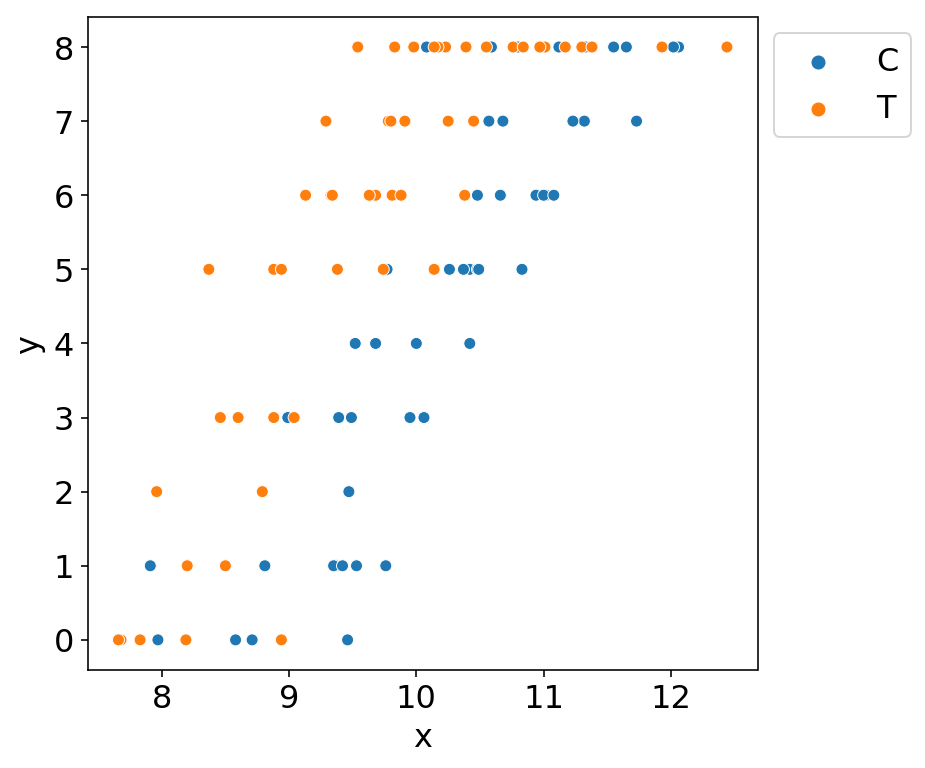

,N,y,x,f,d
count,100.0,100.000000,100.000000,100,100.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,T,NaN
freq,NaN,NaN,NaN,50,NaN
mean,8.0,5.080000,9.967200,NaN,0.500000
std,0.0,2.743882,1.088954,NaN,0.502519
min,8.0,0.000000,7.660000,NaN,0.000000
25%,8.0,3.000000,9.337500,NaN,0.000000
50%,8.0,6.000000,9.965000,NaN,0.500000
75%,8.0,8.000000,10.770000,NaN,1.000000


In [105]:
# Set parameters
fontsize = 16
figsize = (6, 6)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(data=data[0],
                x="x",
                y="y",
                hue="f",
                ax=ax)

# Legend Settings
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# save_fig(filename)
plt.show()

display(data[0].describe(include="all"))

![](https://i.gyazo.com/c9b9744ce59601bb230ab206e532e026.jpg)

# 二項分布

$$
p(y \ \vert \ N, q) = \left( \begin{array}{c}
      N \\
      y \\
    \end{array} \right) q^{y}(1-q)^{N-y}
$$

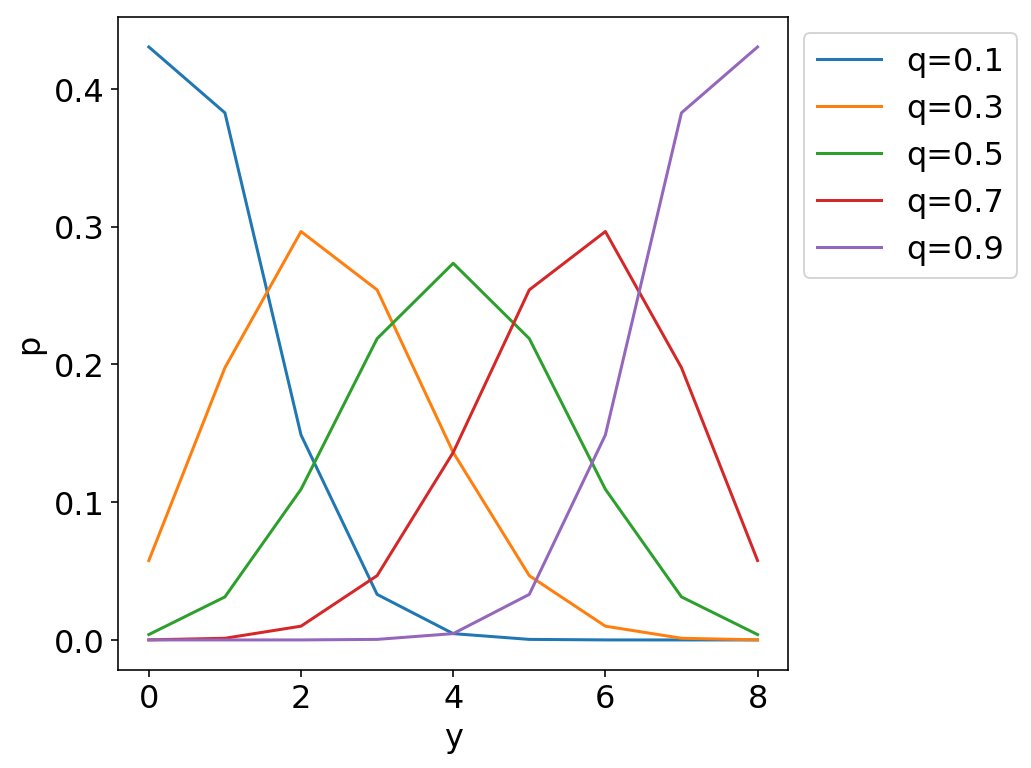

In [106]:
N = 8
qs = np.linspace(0.1, 0.9, 5)

# Set parameters
fontsize = 16
figsize = (6, 6)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for q in qs:
    ax.plot(range(N+1),
            [binom.pmf(y, N, q) for y in range(N+1)],
            label="q={:.1f}".format(q))
plt.legend()
ax.set_xlabel('y')
ax.set_ylabel('p')

# Legend Settings
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# ロジスティック関数

$$
q_i = \text{logistic}(z_i) = \frac{1}{1 + e^{-z_i}}
$$

# ロジット関数

$$
\text{logit}(q_i) = \log{\frac{q_i}{1-q_i}} = z_i
$$

In [107]:
def logistic_func(x, b_1, b_2):
    return 1 / (1 + np.exp(-(b_1 + b_2*x)))

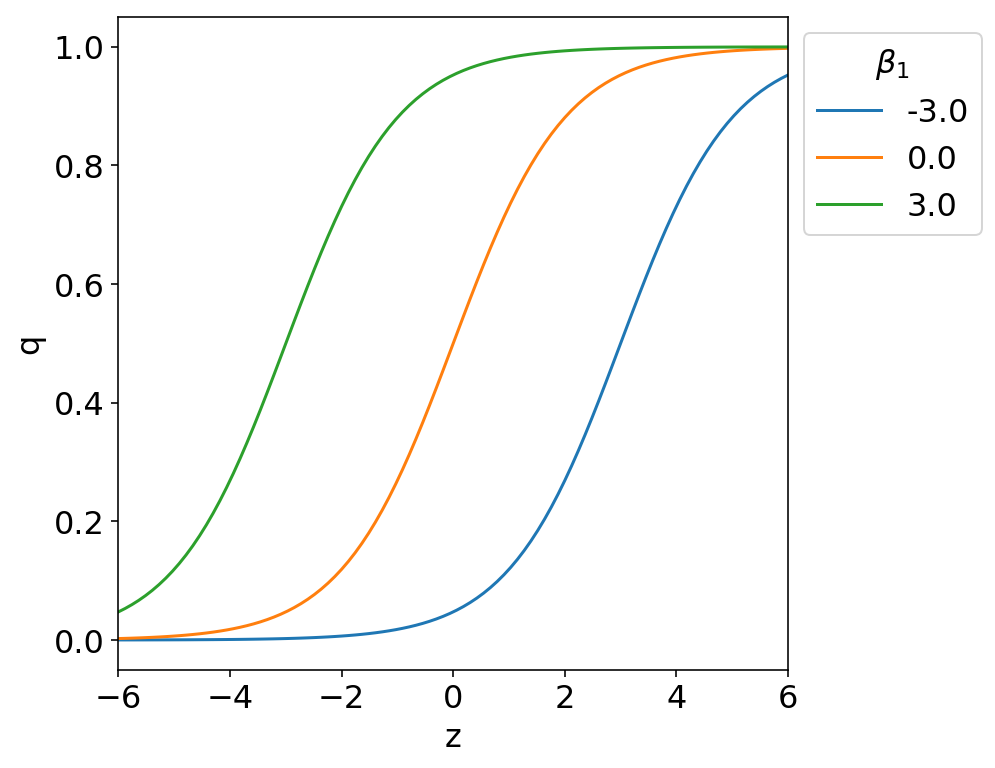

In [108]:
z = np.linspace(-6, 6, 100)
b_1s = np.linspace(-3, 3, 3)

# Set parameters
fontsize = 16
figsize = (6, 6)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for b_1 in b_1s:
    ax.plot(z,
            logistic_func(z, b_1, 1),
            label=b_1)

ax.set_xlabel('z')
ax.set_xlim(-6, 6)

ax.set_ylabel('q')

# Legend Settings
ax.legend(loc='upper left',
          bbox_to_anchor=(1, 1),
          title="$\\beta_1$")

plt.show()

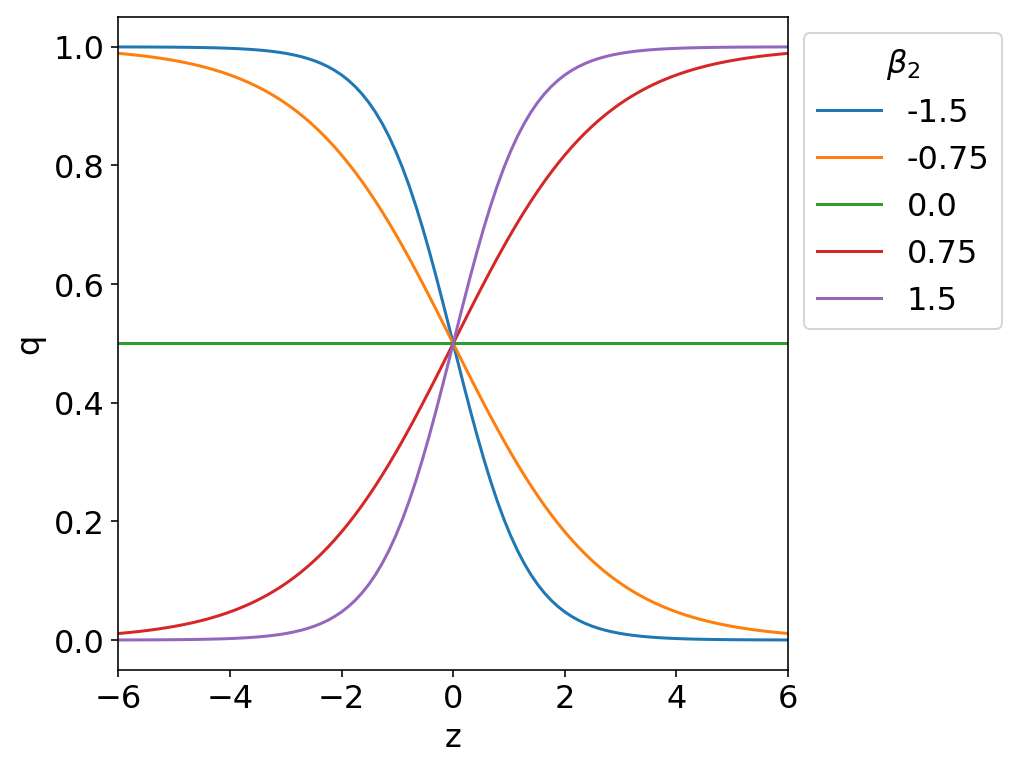

In [109]:
z = np.linspace(-6, 6, 100)
b_2s = np.linspace(-1.5, 1.5, 5)

# Set parameters
fontsize = 16
figsize = (6, 6)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for b_2 in b_2s:
    ax.plot(z,
            logistic_func(z, 0, b_2),
            label=b_2)

ax.set_xlabel('z')
ax.set_xlim(-6, 6)

ax.set_ylabel('q')

# Legend Settings
ax.legend(loc='upper left',
          bbox_to_anchor=(1, 1),
          title="$\\beta_2$")

plt.show()

In [110]:
xd_model = smf.glm(formula='y + I(N - y) ~ x + d',
                   data=data[0],
                   family=sm.families.Binomial()
                  ).fit(disp=0)
display(xd_model.summary())

x_model = smf.glm(formula='y + I(N - y) ~ x',
                  data=data[0],
                  family=sm.families.Binomial()
                 ).fit(disp=0)
display(x_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Fri, 05 Feb 2021   Deviance:                       123.03
Time:                        17:33:20   Pearson chi2:                     109.
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.000     -22.307     -16.765
x              1.9524      0.139     14.059      0.000       1.680       2.225
d              2.0215      0.231      8.740      0.000       1.568       2.475
==============================================================================
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -180.17
Date:                Fri, 05 Feb 2021   Deviance:                       217.17
Time:                        17:33:20   Pearson chi2:                     185.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.7785      1.077    -12.789      0.000     -15.890     -11.667
x              1.4626      0.111     13.214      0.000       1.246       1.680
==============================================================================
"""

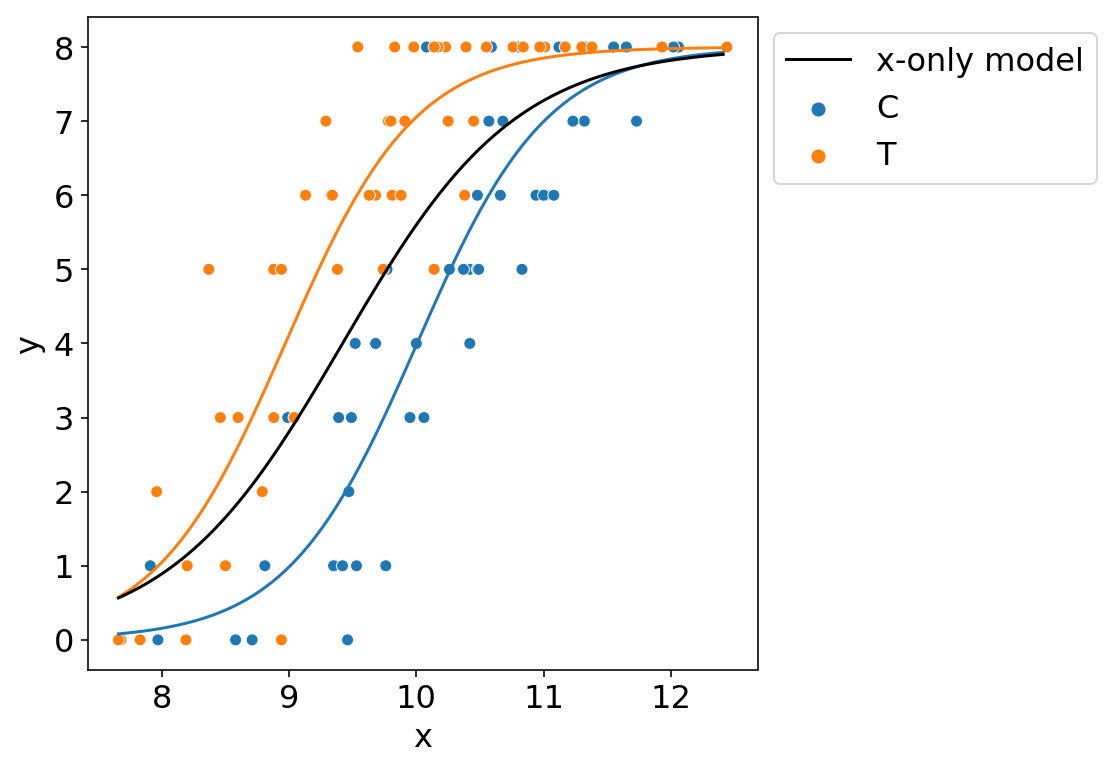

In [111]:
# Set parameters
fontsize = 16
figsize = (6, 6)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(data=data[0],
                x="x",
                y="y",
                hue="f",
                ax=ax)

x=np.arange(data[0]["x"].min(),
            data[0]["x"].max(),
            0.05)

ax.plot(x,
        logistic_func(x,
                      xd_model.params["Intercept"],
                      xd_model.params["x"])*N)
ax.plot(x,
        logistic_func(x,
                      xd_model.params["Intercept"] \
                      + xd_model.params["d"],
                      xd_model.params["x"])*N)
ax.plot(x,
        logistic_func(x,
                      x_model.params["Intercept"],
                      x_model.params["x"])*N,
        'k-',
        label="x-only model")

# Legend Settings
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [112]:
formulas = ["y + I(N - y) ~ 1",
            "y + I(N - y) ~ x",
            "y + I(N - y) ~ d",
            "y + I(N - y) ~ x + d"]
models = {}

for formula in formulas:
    result = smf.glm(formula=formula,
                     data=data[0],
                     family=sm.families.Binomial()
                    ).fit(disp=0)
    models[formula] = result
    print("{formula}: {aic}".format(formula=formula,
                                  aic=result.aic))
print()
    
deviance0 = -2*(models["y + I(N - y) ~ 1"].llf)
deviance1 = -2*(models["y + I(N - y) ~ x"].llf)
deviance2 = -2*(models["y + I(N - y) ~ x + d"].llf)
deviance3 = -2*(models["y + I(N - y) ~ d"].llf)

dif_dev_01 = deviance0 - deviance1
dif_dev_12 = deviance1 - deviance2
dif_dev_03 = deviance0 - deviance3

print("p-value (null model v.s. x model):")
print(stats.chi2.sf(x=dif_dev_01, df=1), "\n", sep="")

print("p-value (x model v.s. x-d model):")
print(stats.chi2.sf(x=dif_dev_12, df=1), "\n", sep="")

print("p-value (null model v.s. d model):")
print(stats.chi2.sf(x=dif_dev_03, df=1), "\n", sep="")

print("odds ratio (effect of fertilization):")
print(np.exp(models[formulas[2]].params["d"]))

y + I(N - y) ~ 1: 644.4093416623778
y + I(N - y) ~ x: 364.345443283716
y + I(N - y) ~ d: 637.7597534566678
y + I(N - y) ~ x + d: 272.21112928522336

p-value (null model v.s. x model):
2.665893010287489e-63

p-value (x model v.s. x-d model):
2.9482377648711646e-22

p-value (null model v.s. d model):
0.0032713528479634945

odds ratio (effect of fertilization):
1.542667209333876


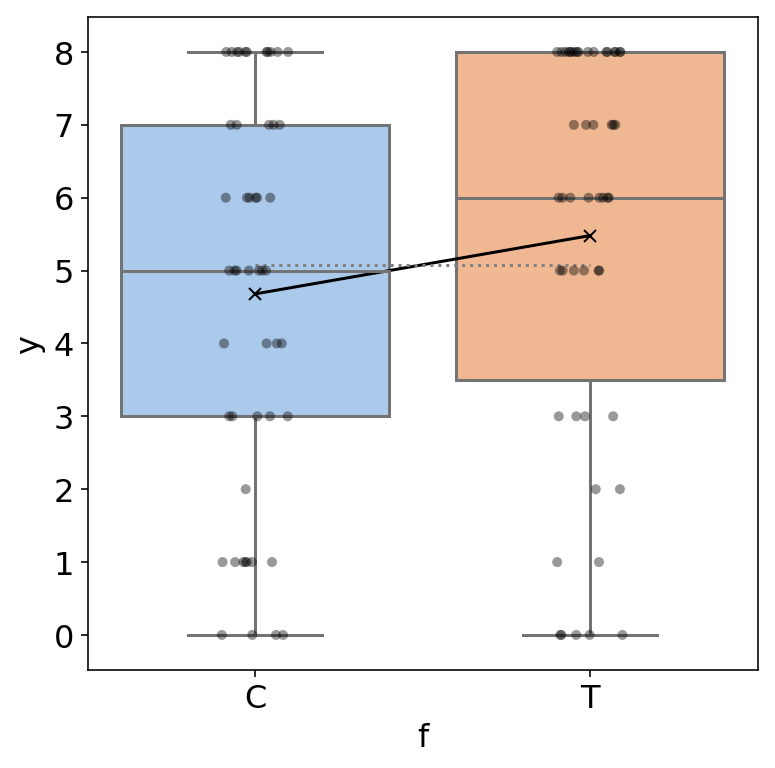

p-value by Welch's t-test: 0.1457871591880726
p-value by Manwhitney's U-test: 0.11359409636542171
p-value by Steel-Dwass test: 0.112796141383948
p-value by Likelihood ratio test: 0.0032713528479634945


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [113]:
# Set parameters
fontsize = 16
figsize = (6, 6)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(data=data[0],
            x="f",
            y="y",
            palette="pastel",
            showmeans=True,
            meanprops={"marker": "x",
                       "markeredgecolor": "black"},
            fliersize=0,
            ax=ax)
sns.stripplot(data=data[0],
              x="f",
              y="y",
              ax=ax,
              color="black",
              alpha=0.4)

model = models[formulas[2]]
ax.plot([0, 1],
        logistic_func(np.array([0, 1]),
                      model.params["Intercept"],
                      model.params["d"])*N,
        'k-',
        label="d-only model")
model2 = models[formulas[0]]
ax.plot([0, 1],
        logistic_func(np.array([0, 1]),
                      model2.params["Intercept"],
                      0)*N,
        ':',
        color="grey",
        label="null model")

plt.show()

df = data[0]
welch = stats.ttest_ind(df[df["d"] == 0]["y"],
                            df[df["d"] == 1]["y"],
                            equal_var=False).pvalue
print("p-value by Welch's t-test:", welch)

mnwhtn = sp.posthoc_mannwhitney(df,
                                val_col="y",
                                group_col="d")[0][1]
print("p-value by Manwhitney's U-test:", mnwhtn)

dscf = sp.posthoc_dscf(df,
                       val_col="y",
                       group_col="d")[0][1]
print("p-value by Steel-Dwass test:", dscf)

print("p-value by Likelihood ratio test:",
      stats.chi2.sf(x=dif_dev_03, df=1))

# 交互作用付き

In [114]:
formulas.append('y + I(N - y) ~ x + d + x:d')

models[formulas[4]] = smf.glm(formula=formulas[4],
                               data=data[0],
                               family=sm.families.Binomial()).fit(disp=0)
display(models[formulas[4]].summary())

print("AIC of x-d with interaction model:")
print(models[formulas[4]].aic)

print("AIC of x-d w/o interaction model:")
print(models[formulas[3]].aic)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Fri, 05 Feb 2021   Deviance:                       122.43
Time:                        17:33:20   Pearson chi2:                     109.
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5233      1.886     -9.821      0.000     -22.220     -14.827
x              1.8525      0.186      9.983      0.000       1.489       2.216
d             -0.0638      2.704     -0.024      0.981      -5.363       5.235
x:d            0.2163      0.280      0.772      0.440      -0.333       0.765
==============================================================================
"""

AIC of x-d with interaction model:
273.61059672597395
AIC of x-d w/o interaction model:
272.21112928522336


In [115]:
def logistic_interact_func(x, d, b_1, b_2, b_3, b_4):
    return 1 / (1 + np.exp(-(b_1 + b_2*x + b_3*d + b_4*x*d)))

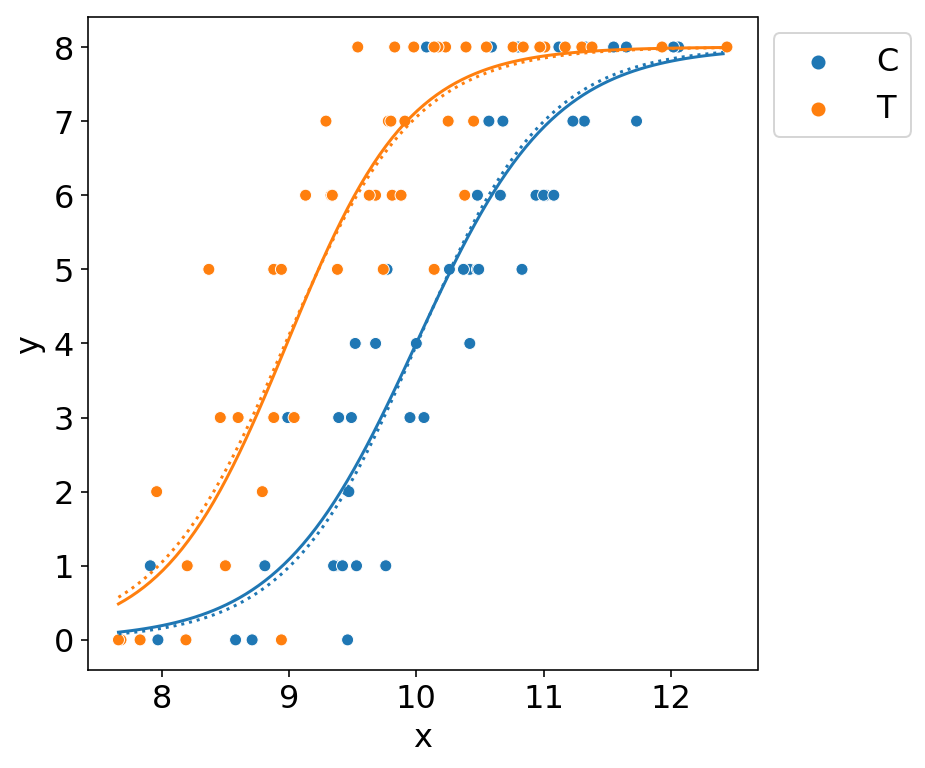

In [116]:
# Set parameters
fontsize = 16
figsize = (6, 6)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(data=data[0],
                x="x",
                y="y",
                hue="f",
                ax=ax)

x=np.arange(data[0]["x"].min(),
            data[0]["x"].max(),
            0.05)


ax.plot(x,
        logistic_interact_func(x,
                               0,
                               models[formulas[4]].params["Intercept"],
                               models[formulas[4]].params["x"],
                               models[formulas[4]].params["d"],
                               models[formulas[4]].params["x:d"])*8,
        "-",
        color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
ax.plot(x,
        logistic_func(x,
                      xd_model.params["Intercept"],
                      xd_model.params["x"])*N,
        ":",
        color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
ax.plot(x,
        logistic_interact_func(x,
                               1,
                               models[formulas[4]].params["Intercept"],
                               models[formulas[4]].params["x"],
                               models[formulas[4]].params["d"],
                               models[formulas[4]].params["x:d"])*8,
        "-",
        color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
ax.plot(x,
        logistic_func(x,
                      xd_model.params["Intercept"] \
                      + xd_model.params["d"],
                      xd_model.params["x"])*N,
        ":",
        color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
                               
# Legend Settings
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# offset項を用いることで割算の無いGLMを

In [127]:
def exp_func(x, b_1, b_2):
    return np.exp(b_1 + b_2*x)

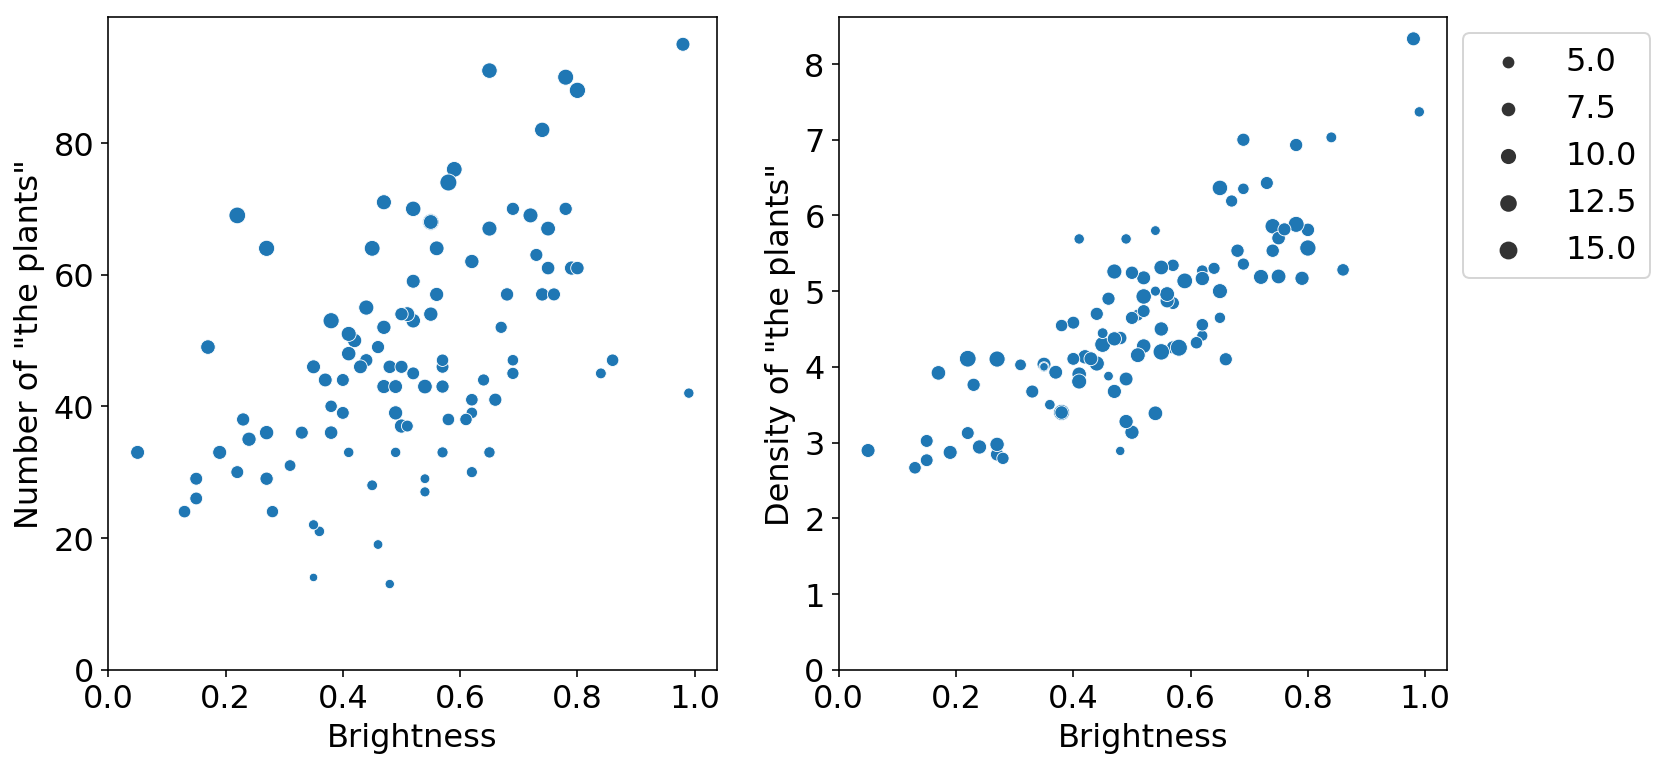

,y,x,A,yA
count,100.000000,100.000000,100.000000,100.000000
mean,48.090000,0.514100,10.468000,4.618282
std,17.137056,0.188573,2.927262,1.114747
min,13.000000,0.050000,3.500000,2.666667
25%,36.000000,0.400000,8.800000,3.926429
50%,46.000000,0.515000,10.300000,4.522727
75%,59.500000,0.642500,12.150000,5.272927
max,95.000000,0.990000,17.400000,8.333333


In [149]:
df = data[1].copy()
df["yA"] = df["y"] / df["A"]

# Set parameters
fontsize = 16
figsize = (12, 6)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.scatterplot(data=df,
                x="x",
                y="y",
                size="A",
                ax=ax1)

sns.scatterplot(data=df,
                x="x",
                y="yA",
                size="A",
                ax=ax2)


ax1.set_xlabel("Brightness")
ax1.set_ylabel("Number of \"the plants\"")

ax2.set_xlabel("Brightness")
ax2.set_ylabel("Density of \"the plants\"")
# Legend Settings
ax1.legend().remove()
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax1.set_xlim(0, )
ax1.set_ylim(0, )

ax2.set_xlim(0, )
ax2.set_ylim(0, )
# save_fig(filename)
plt.show()

display(df.describe(include="all"))

# 面積の影響を考える

- 調査地を100設定した($i \in \{1, 2, \cdots, 100\}$)
- 調査地$i$ごとにその面積$A_i$は異なる
- 調査地$i$の明るさ$x_i$を計測した
- 調査地$i$におけるある植物個体数$y_i$を計測した

→ 個体密度$\frac{y_i}{A_i}$と明るさ$x_i$との関係を調べたい

ある調査地$i$の個体密度は，$\lambda_{i}$を平均個体数とすると，

$$
\frac{\lambda_{i}}{A_i}
$$

となる．ここで，個体密度に指数関数でフィッティングすると

$$\frac{\lambda_{i}}{A_i} = \exp(\beta_1 + \beta_2 x_i)$$

よって，

$$
\begin{align}
  \lambda_{i} &= A_i \exp(\beta_1 + \beta_2 x_i) \\
  &= \exp(\beta_1 + \beta_2 x_i + \log{A_i})
\end{align}
$$

$\log{A_i}$のように，線形予測子の中で係数(パラメータ)のつかない項をオフセット項と呼ぶ．  
オフセット項により，$\lambda$を離散値のまま扱え，ポアソン分布を適用できる

In [154]:
result1 = smf.glm(formula='y ~ x',
                  offset=np.log(df['A']),
                  data=df,
                  family=sm.families.Poisson()).fit(disp=0)
result0 = smf.glm(formula='y ~ 1',
                  offset=np.log(df['A']),
                  data=df,
                  family=sm.families.Poisson()).fit(disp=0)

display(result1.summary())
display(result0.summary())
display(result2.summary())

dif_dev = -2*(result0.llf - result1.llf)
print("Difference of Deviance:", dif_dev)
print("p-value:", stats.chi2.sf(x=dif_dev, df=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.17
Date:                Fri, 05 Feb 2021   Deviance:                       81.608
Time:                        17:59:18   Pearson chi2:                     81.5
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9731      0.045     21.600      0.000       0.885       1.061
x              1.0383      0.078     13.364      0.000       0.886       1.191
==============================================================================
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -413.09
Date:                Fri, 05 Feb 2021   Deviance:                       261.46
Time:                        17:59:18   Pearson chi2:                     266.
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5248      0.014    105.737      0.000       1.496       1.553
==============================================================================
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     yA   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -173.01
Date:                Fri, 05 Feb 2021   Deviance:                       8.2871
Time:                        17:59:18   Pearson chi2:                     8.27
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9693      0.145      6.697      0.000       0.686       1.253
x              1.0528      0.249      4.233      0.000       0.565       1.540
==============================================================================
"""

Difference of Deviance: 179.84843929445628
p-value: 5.230127101575349e-41


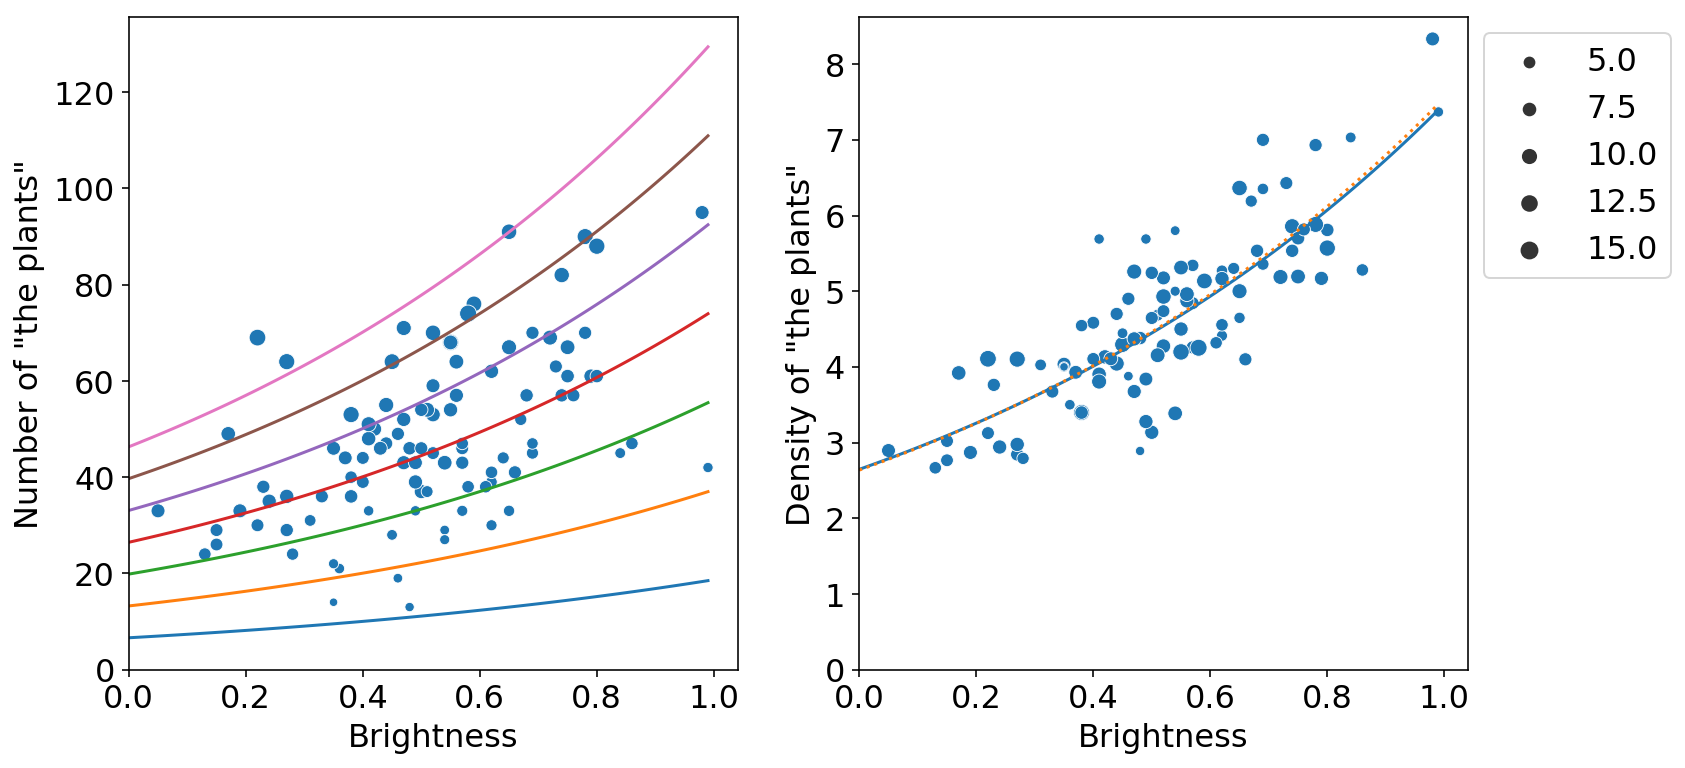

In [155]:
# Set parameters
fontsize = 16
figsize = (12, 6)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

x = np.arange(0, 1, 0.01)

sns.scatterplot(data=df,
                x="x",
                y="y",
                size="A",
                ax=ax1)
for area in [2.5, 5, 7.5,
             10, 12.5, 15,
             17.5]:
    ax1.plot(x,
             exp_func(x,
                      result1.params["Intercept"] \
                      + np.log(area),
                      result1.params["x"]))

sns.scatterplot(data=df,
                x="x",
                y="yA",
                size="A",
                ax=ax2)
ax2.plot(x,
         exp_func(x,
                  result1.params["Intercept"],
                  result1.params["x"]))
ax2.plot(x,
         exp_func(x,
                  result2.params["Intercept"],
                  result2.params["x"]),
         ":")


ax1.set_xlabel("Brightness")
ax1.set_ylabel("Number of \"the plants\"")

ax2.set_xlabel("Brightness")
ax2.set_ylabel("Density of \"the plants\"")
# Legend Settings
ax1.legend().remove()
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax1.set_xlim(0, )
ax1.set_ylim(0, )

ax2.set_xlim(0, )
ax2.set_ylim(0, )
# save_fig(filename)
plt.show()

# でも連続値データでも良い気がする

密度が連続値なのでポアソン分布を使えず，オフセット項を用いた．  
しかし，連続値でもフィッティングできるならいいのではないだろうか．

密度は，非負の連続値をとる．こういう場合はガンマ分布を使える．
確率密度分布は

$$
p(y\ \vert\ s, r) = \frac{r^s}{\Gamma(s)}y^{s-1} \exp(-ry)
$$

また，ガンマ分布の平均値は対数リンク関数として表せる

$$
\begin{align}
  \log(\mu_{i}) &= \beta_{1} + \beta_{2}x_i \\
  \Leftrightarrow \mu_{i} &= \exp(\beta_1 + \beta_2 x_i)
\end{align}
$$

In [172]:
def gamma_fit(x, b_1, b_2):
    return np.exp(b_1 + b_2*x)

In [169]:
result4 = smf.glm(formula='yA ~ x',
                  data=df,
                  family=sm.families.Gamma(
                      link=sm.families.links.log)).fit(disp=0)
result3 = smf.glm(formula='yA ~ 1',
                  data=df,
                  family=sm.families.Gamma(
                      link=sm.families.links.log)).fit(disp=0)

display(result4.summary())
display(result3.summary())

dif_dev = -2*(result3.llf - result4.llf)
print("Difference of Deviance:", dif_dev)
print("p-value:", stats.chi2.sf(x=dif_dev, df=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     yA   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                        0.018775
Method:                          IRLS   Log-Likelihood:                -93.018
Date:                Fri, 05 Feb 2021   Deviance:                       1.8626
Time:                        18:24:15   Pearson chi2:                     1.84
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9699      0.040     24.269      0.000       0.892       1.048
x              1.0516      0.073     14.400      0.000       0.908       1.195
==============================================================================
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     yA   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                   Gamma   Df Model:                            0
Link Function:                    log   Scale:                        0.058263
Method:                          IRLS   Log-Likelihood:                -149.73
Date:                Fri, 05 Feb 2021   Deviance:                       5.7526
Time:                        18:24:15   Pearson chi2:                     5.77
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5300      0.024     63.387      0.000       1.483       1.577
==============================================================================
"""

Difference of Deviance: 113.4310824240597
p-value: 1.736119668176022e-26


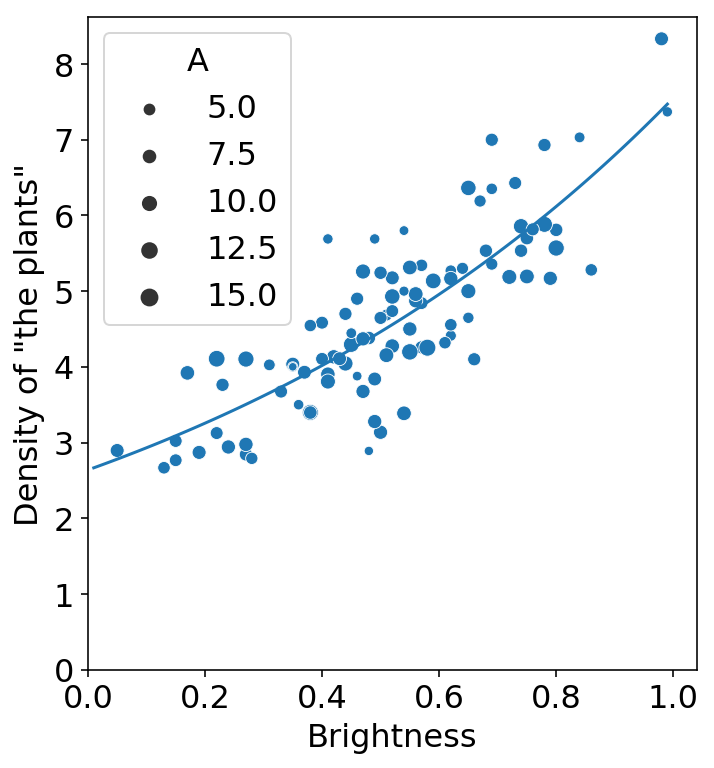

In [177]:
# Set parameters
fontsize = 16
figsize = (12, 6)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)

x = np.arange(0.01, 1, 0.01)

sns.scatterplot(data=df,
                x="x",
                y="yA",
                size="A",
                ax=ax)
ax.plot(x,
        gamma_fit(x,
                  result4.params["Intercept"],
                  result4.params["x"]))

ax.set_xlabel("Brightness")
ax.set_ylabel("Density of \"the plants\"")
# Legend Settings

ax.set_xlim(0, )
ax.set_ylim(0, )

# save_fig(filename)
plt.show()

# いっそのこと直線近似はどうか

ばらつきがガンマ分布だとして，リンク関数を恒等関数にすることで，直線のフィッティングになる．  
これは，非負の区間が定義域の分布を直線で近似したいときによいのではないか

In [178]:
result6 = smf.glm(formula='yA ~ x',
                  data=df,
                  family=sm.families.Gamma(
                      link=sm.families.links.identity)).fit(disp=0)
result5 = smf.glm(formula='yA ~ 1',
                  data=df,
                  family=sm.families.Gamma(
                      link=sm.families.links.identity)).fit(disp=0)
result7 = smf.glm(formula='yA ~ x',
                  data=df,
                  family=sm.families.Gaussian()).fit(disp=0)

display(result6.summary())
display(result5.summary())
display(result7.summary())

dif_dev = -2*(result5.llf - result6.llf)
print("Difference of Deviance:", dif_dev)
print("p-value:", stats.chi2.sf(x=dif_dev, df=1))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  DomainWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  DomainWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     yA   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                   Gamma   Df Model:                            1
Link Function:               identity   Scale:                        0.019347
Method:                          IRLS   Log-Likelihood:                -94.788
Date:                Fri, 05 Feb 2021   Deviance:                       1.9296
Time:                        18:33:21   Pearson chi2:                     1.90
No. Iterations:                    10   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2877      0.150     15.255      0.000       1.994       2.582
x              4.5221      0.314     14.421      0.000       3.907       5.137
==============================================================================
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     yA   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                   Gamma   Df Model:                            0
Link Function:               identity   Scale:                        0.058263
Method:                          IRLS   Log-Likelihood:                -149.73
Date:                Fri, 05 Feb 2021   Deviance:                       5.7526
Time:                        18:33:21   Pearson chi2:                     5.77
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6183      0.111     41.429      0.000       4.400       4.837
==============================================================================
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     yA   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.41043
Method:                          IRLS   Log-Likelihood:                -96.356
Date:                Fri, 05 Feb 2021   Deviance:                       40.222
Time:                        18:33:21   Pearson chi2:                     40.2
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1250      0.187     11.372      0.000       1.759       2.491
x              4.8498      0.341     14.204      0.000       4.181       5.519
==============================================================================
"""

Difference of Deviance: 109.89174141843898
p-value: 1.0349114071174307e-25


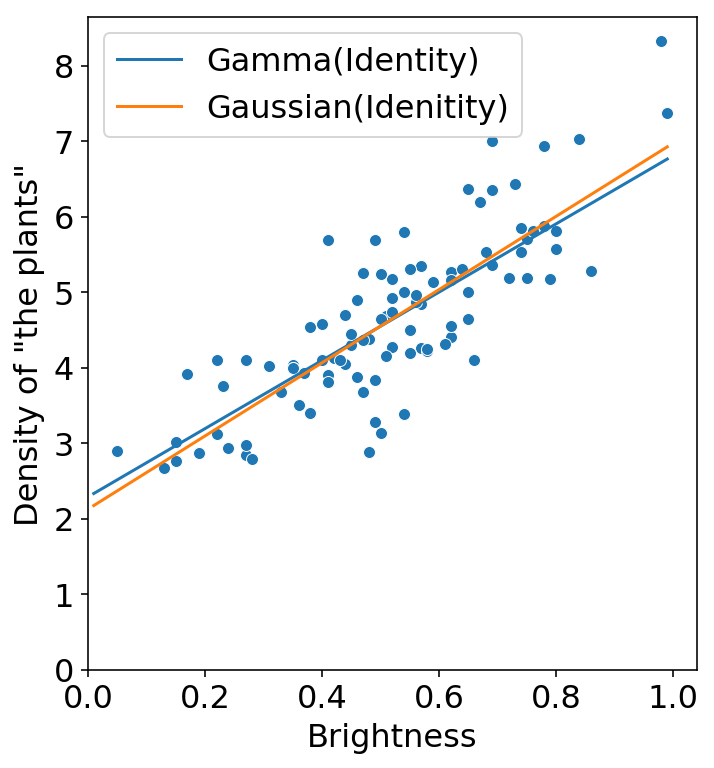

In [186]:
# Set parameters
fontsize = 16
figsize = (12, 6)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)

x = np.arange(0.01, 1, 0.01)

sns.scatterplot(data=df,
                x="x",
                y="yA",
                ax=ax)
ax.plot(x,
        result6.params["Intercept"] + x*result6.params["x"],
        label="Gamma(Identity)")

ax.plot(x,
        result7.params["Intercept"] + x*result7.params["x"],
        label="Gaussian(Idenitity)")

ax.set_xlabel("Brightness")
ax.set_ylabel("Density of \"the plants\"")
# Legend Settings
ax.legend()

ax.set_xlim(0, )
ax.set_ylim(0, )

# save_fig(filename)
plt.show()